# 01_data_exploration.ipynb

## 📌 Purpose
This notebook performs exploratory data analysis (EDA) on the pre-cleaned dataset
and clinical notes pulled from MIMIC-IV. It visualizes distributions, missingness,
class imbalance, and text characteristics.  

Functions are imported from `src/data_prep.py`.


### Imports

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from src.data_prep import load_cleaned_data, inspect_dataframes
from src.utils import resolve_path, save_fig

### Load Structured Dataset

In [2]:
# Path to dataset (update after SQL fix)
df_clean = load_cleaned_data(resolve_path("data/raw/data_after_cleaning.csv"))
df_clean.head()


✅ Loaded cleaned dataset from C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\data\raw\data_after_cleaning.csv with shape (5208, 48)


,subject_id,hospital_expire_flag,max_age,los_icu,first_hosp_stay,suspected_infection,sofa_score,sepsis3,avg_urineoutput,glucose_min,...,race_Hispanic or Latin,race_Others race,race_White,antibiotic_Vancomycin,antibiotic_Vancomycin Antibiotic Lock,antibiotic_Vancomycin Enema,antibiotic_Vancomycin Intrathecal,antibiotic_Vancomycin Oral Liquid,gender_F,gender_M
0,19986715,0,24,10.58,True,1,2,True,136.657143,82,...,0,0,0,1,0,0,0,0,1,0
1,19973083,0,58,2.33,True,1,8,True,34.263158,94,...,0,0,0,1,0,0,0,0,1,0
2,19907774,1,65,1.83,True,1,2,True,105.476191,65,...,0,0,0,1,0,0,0,0,1,0
3,19894745,1,76,1.08,True,1,4,True,34.000000,267,...,0,0,0,1,0,0,0,0,1,0
4,19884808,1,64,20.46,True,1,5,True,107.229508,146,...,0,0,0,1,0,0,0,0,1,0


### Dataset Summary

In [3]:
print("Shape:", df_clean.shape)
print(df_clean.info())
df_clean.describe(include="all")


Shape: (5208, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   subject_id                             5208 non-null   int64  
 1   hospital_expire_flag                   5208 non-null   int64  
 2   max_age                                5208 non-null   int64  
 3   los_icu                                5208 non-null   float64
 4   first_hosp_stay                        5208 non-null   bool   
 5   suspected_infection                    5208 non-null   int64  
 6   sofa_score                             5208 non-null   int64  
 7   sepsis3                                5208 non-null   bool   
 8   avg_urineoutput                        5208 non-null   float64
 9   glucose_min                            5208 non-null   int64  
 10  glucose_max                            5208 non-null  

,subject_id,hospital_expire_flag,max_age,los_icu,first_hosp_stay,suspected_infection,sofa_score,sepsis3,avg_urineoutput,glucose_min,...,race_Hispanic or Latin,race_Others race,race_White,antibiotic_Vancomycin,antibiotic_Vancomycin Antibiotic Lock,antibiotic_Vancomycin Enema,antibiotic_Vancomycin Intrathecal,antibiotic_Vancomycin Oral Liquid,gender_F,gender_M
count,5.208000e+03,5208.000000,5208.00000,5208.000000,5208,5208.0,5208.000000,5208,5208.000000,5208.000000,...,5208.000000,5208.000000,5208.000000,5208.000000,5208.000000,5208.000000,5208.0,5208.000000,5208.000000,5208.000000
unique,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,5208,NaN,NaN,5208,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.501884e+07,0.230991,64.77573,6.668679,NaN,1.0,4.407642,NaN,173.875040,100.759793,...,0.053955,0.178379,0.636137,0.852727,0.001536,0.008449,0.0,0.059524,0.416091,0.583909
std,2.886479e+06,0.421507,15.83041,8.633552,NaN,0.0,2.446178,NaN,118.797223,36.762319,...,0.225951,0.382869,0.481156,0.354412,0.039167,0.091536,0.0,0.236625,0.492956,0.492956
min,1.000201e+07,0.000000,19.00000,1.040000,NaN,1.0,2.000000,NaN,-100.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.254311e+07,0.000000,55.00000,1.960000,NaN,1.0,2.000000,NaN,97.054825,79.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.498578e+07,0.000000,66.00000,3.480000,NaN,1.0,4.000000,NaN,153.000000,96.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
75%,1.755050e+07,0.000000,76.00000,7.710000,NaN,1.0,6.000000,NaN,219.428788,116.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000


### Class Balance

✅ Saved figure: C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\reports\figures\exploration\class_distribution_sepsis_mortality.png


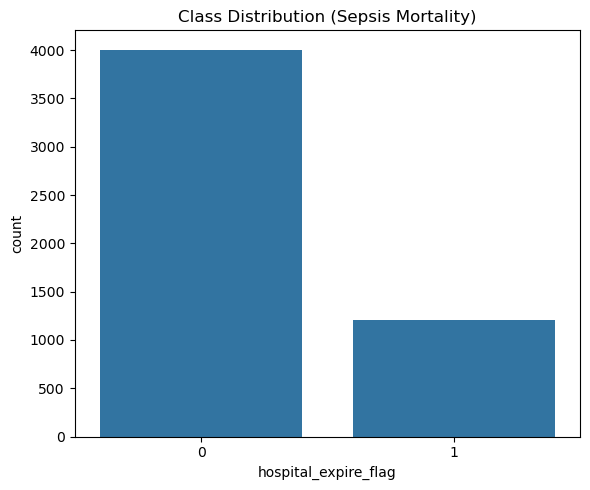

In [5]:
fig, ax = plt.subplots(figsize=(6,5))
sns.countplot(x="hospital_expire_flag", data=df_clean, ax=ax)
ax.set_title("Class Distribution (Sepsis Mortality)")

save_fig(fig, "class_distribution_sepsis_mortality")
plt.show()

### Missingness Check

✅ Saved figure: C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\reports\figures\exploration\missing_values_heatmap.png


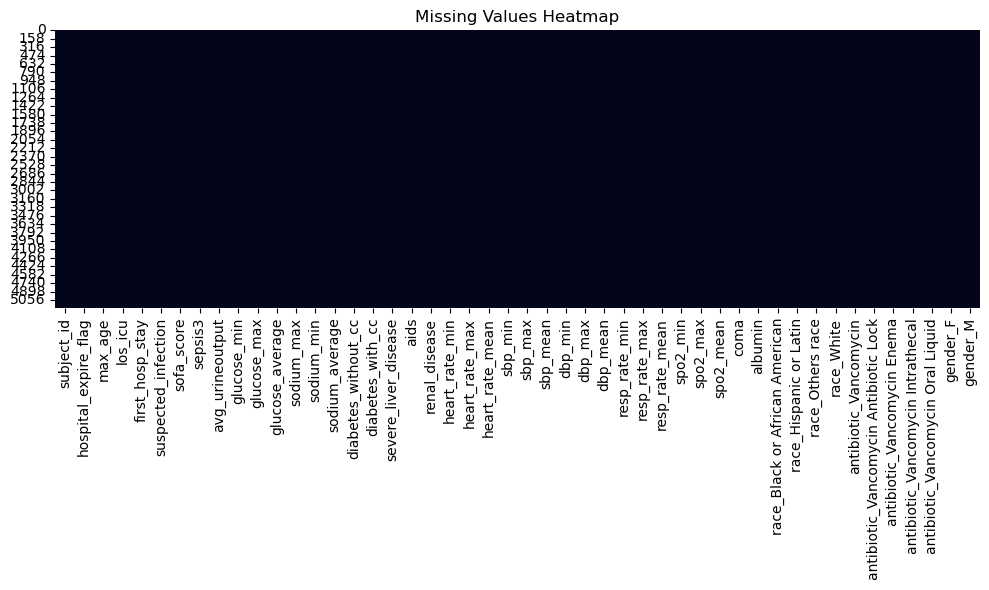

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_clean.isnull(), cbar=False, ax=ax)
ax.set_title("Missing Values Heatmap")

save_fig(fig, "missing_values_heatmap")
plt.show()

In [7]:
nlp_ready_df = pd.read_csv(resolve_path("data/interim/data_nlp_ready.csv"))

missing_radiology = nlp_ready_df[nlp_ready_df["Radiology_notes"].isna() | (nlp_ready_df["Radiology_notes"] == "")]
missing_discharge = nlp_ready_df[nlp_ready_df["Discharge_summary_notes"].isna() | (nlp_ready_df["Discharge_summary_notes"] == "")]

print(f"Patients missing radiology notes: {len(missing_radiology)}")
print(f"Patients missing discharge notes: {len(missing_discharge)}")


Patients missing radiology notes: 2
Patients missing discharge notes: 12


### Notes Data Preview

In [8]:
# After preprocessing, load NLP-ready dataset
df_notes = pd.read_csv("../data/interim/data_nlp_ready.csv")

# Preview
df_notes[["subject_id", "Radiology_notes", "Discharge_summary_notes", "combined_notes"]].head(10)


,subject_id,Radiology_notes,Discharge_summary_notes,combined_notes
0,19986715,"EXAMINATION: PELVIS, NON-OBSTETRIC INDICATION:...",Name: Unit No: Admission Date: Discharge Da...,"EXAMINATION: PELVIS, NON-OBSTETRIC INDICATION:..."
1,19973083,EXAMINATION: CHEST (PORTABLE AP) INDICATION: H...,Name: Unit No: Admission Date: Discharge Da...,EXAMINATION: CHEST (PORTABLE AP) INDICATION: H...
2,19907774,LIVER ULTRASOUND DUPLEX CLINICAL HISTORY: TIPS...,Name: Unit No: Admission Date: Discharge Da...,LIVER ULTRASOUND DUPLEX CLINICAL HISTORY: TIPS...
3,19894745,INDICATION: woman with altered mental status....,Name: Unit No: Admission Date: Discharge Da...,INDICATION: woman with altered mental status....
4,19884808,STUDY: CT of the head without contrast. INDICA...,Name: Unit No: Admission Date: Discharge Da...,STUDY: CT of the head without contrast. INDICA...
5,19846489,REASON FOR EXAMINATION: Evaluation of subclavi...,Name: Unit No: Admission Date: Discharge Da...,REASON FOR EXAMINATION: Evaluation of subclavi...
6,19831143,HISTORY: Lumbago. FINDINGS: The L5-S1 interspa...,Name: Unit No: Admission Date: Discharge Da...,HISTORY: Lumbago. FINDINGS: The L5-S1 interspa...
7,19830951,EXAMINATION: RENAL U.S. INDICATION: year old ...,Name: Unit No: Admission Date: Discharge Da...,EXAMINATION: RENAL U.S. INDICATION: year old ...
8,19824335,INDICATION: woman with 47 cm left PICC placem...,Name: Unit No: Admission Date: Discharge Da...,INDICATION: woman with 47 cm left PICC placem...
9,19812504,"INDICATION: Shortness of breath and hypoxia, q...",Name: Unit No: Admission Date: Discharge Da...,"INDICATION: Shortness of breath and hypoxia, q..."


### Notes Data Preview

✅ Saved figure: C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\reports\figures\exploration\distribution_radiology_note_lengths.png


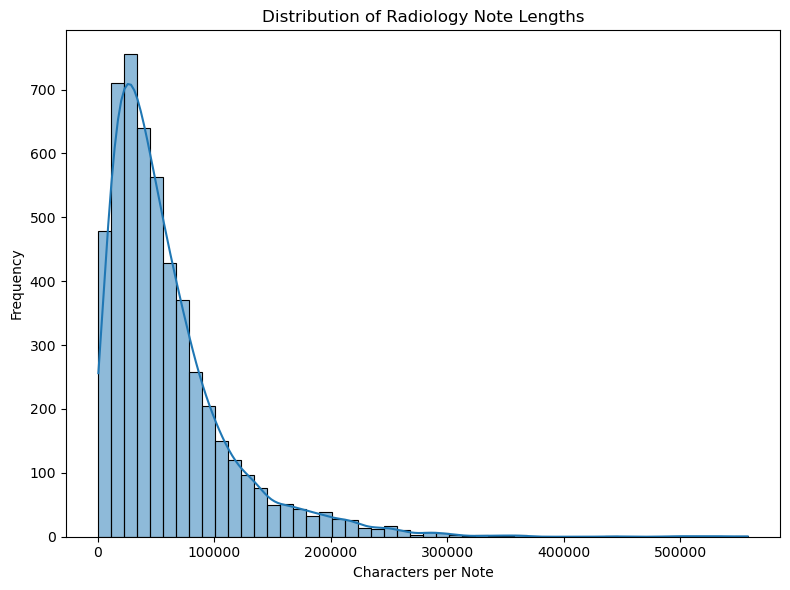

In [11]:
df_notes["note_length"] = df_notes["Radiology_notes"].str.len()

fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df_notes["note_length"], bins=50, kde=True, ax=ax)
ax.set_title("Distribution of Radiology Note Lengths")
ax.set_xlabel("Characters per Note")
ax.set_ylabel("Frequency")

save_fig(fig, "distribution_radiology_note_lengths")
plt.show()


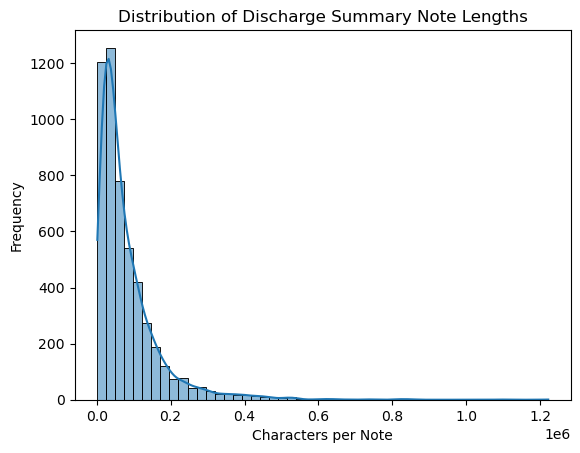

In [9]:
df_notes["note_length"] = df_notes["Discharge_summary_notes"].str.len()

sns.histplot(df_notes["note_length"], bins=50, kde=True)
plt.title("Distribution of Discharge Summary Note Lengths")
plt.xlabel("Characters per Note")
plt.ylabel("Frequency")
plt.show()

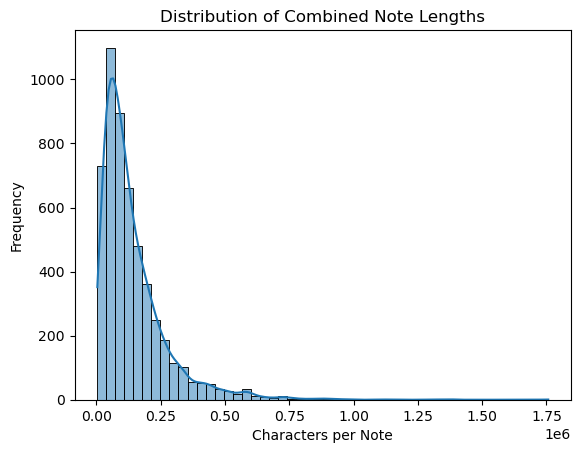

In [10]:
df_notes["note_length"] = df_notes["combined_notes"].str.len()

sns.histplot(df_notes["note_length"], bins=50, kde=True)
plt.title("Distribution of Combined Note Lengths")
plt.xlabel("Characters per Note")
plt.ylabel("Frequency")
plt.show()

## Next Steps


- Move to `02_data_preprocessing.ipynb` for truncation, tokenization,
  and preparation of notes for Word2Vec / BERT.
